# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
df=pd.read_csv('Cancer.csv')

In [3]:
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [7]:
df.shape

(699, 11)

In [8]:
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
# bare nuclie is missing

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [70]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

# checking for any missing values
df.isna().sum().any()


False

In [11]:
#checking for null values
df.isnull().sum().any()

False

In [12]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [13]:
# No missing values found. So let us try to remove ? from bare nuclei column


# Get count of rows having ?
df[df['Bare Nuclei']=="?"].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [14]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [15]:
df['Bare Nuclei'].replace("?",'1',inplace=True)

In [16]:
df['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [17]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [18]:
df['Bare Nuclei']=df['Bare Nuclei'].astype('int64')

In [19]:
df.dtypes #after changing the datatype of Bare nuclei

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [20]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 9


In [21]:
df.drop_duplicates(keep='first', inplace=True)

In [22]:
df.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [23]:
# Check for correlation of variable
df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


In [24]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


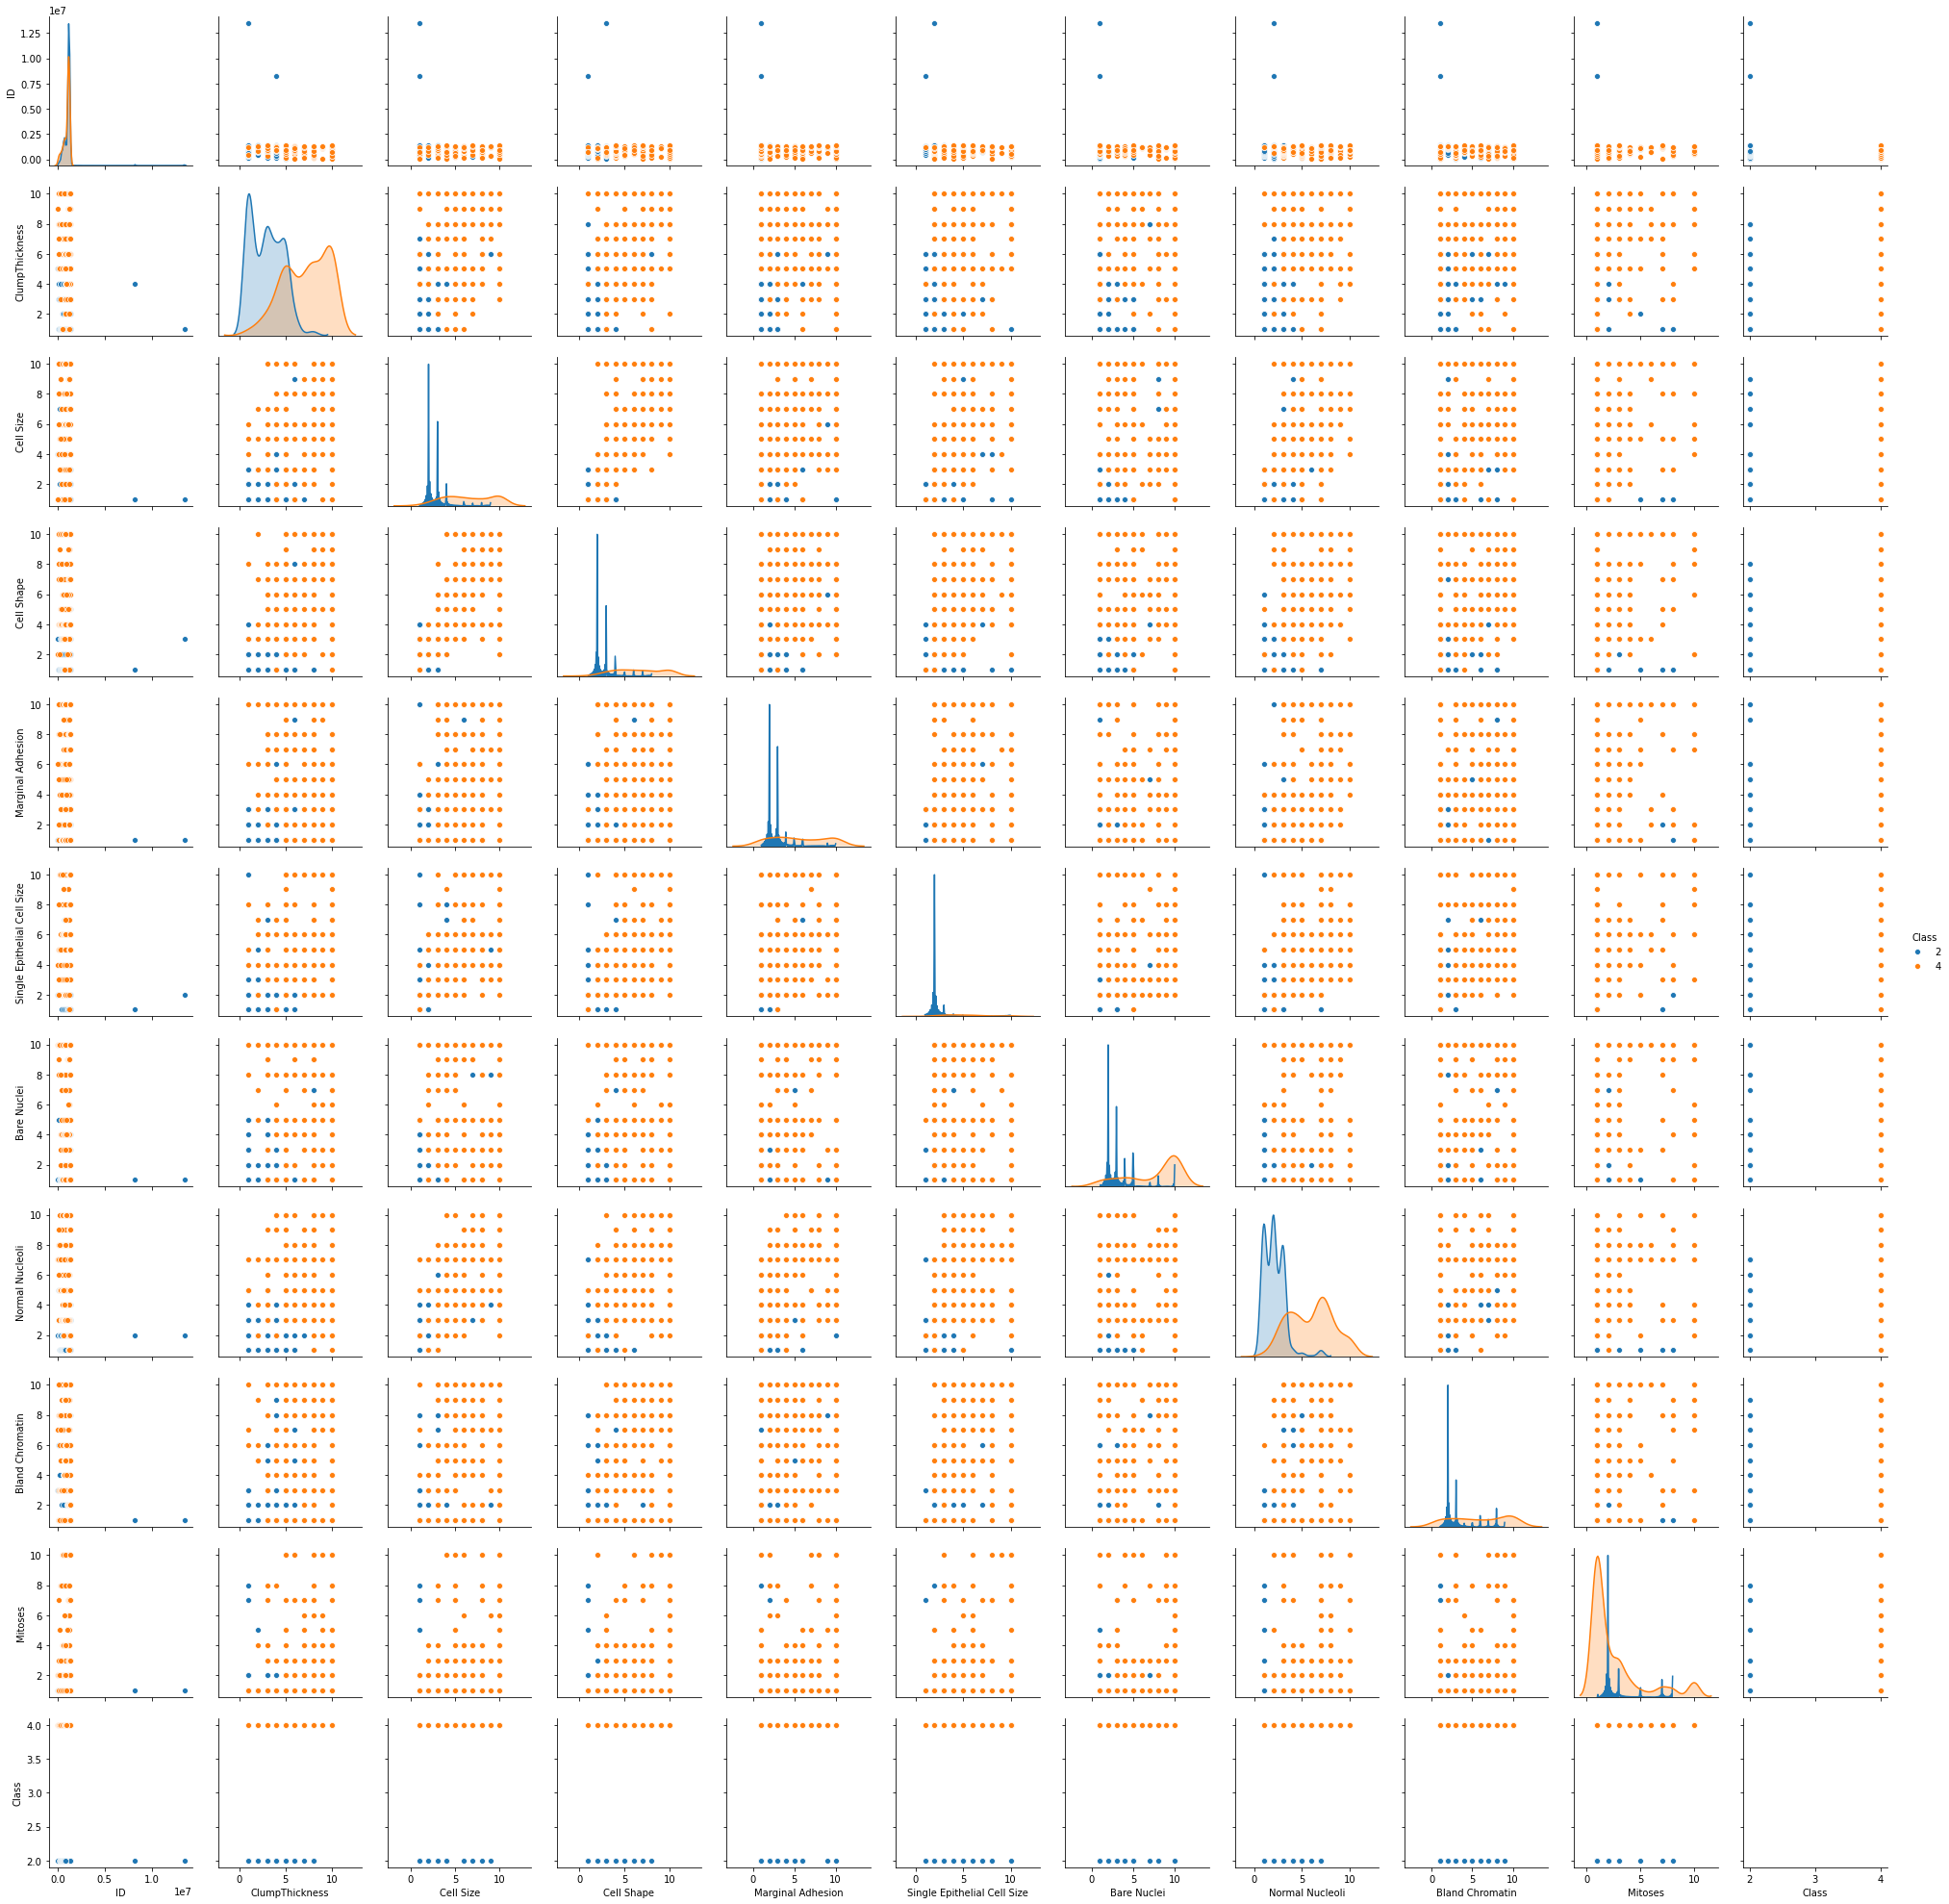

In [25]:
#Let us check for pair plots
sns.pairplot(df , diag_kind='kde',hue='Class')

In [26]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10


# Observations
# ID- doesnt affect the target variable 
# Clumbthickness and Normal nucleoli are correlated  with target variable Class
# Mitosis is not contriuting much to the target variable

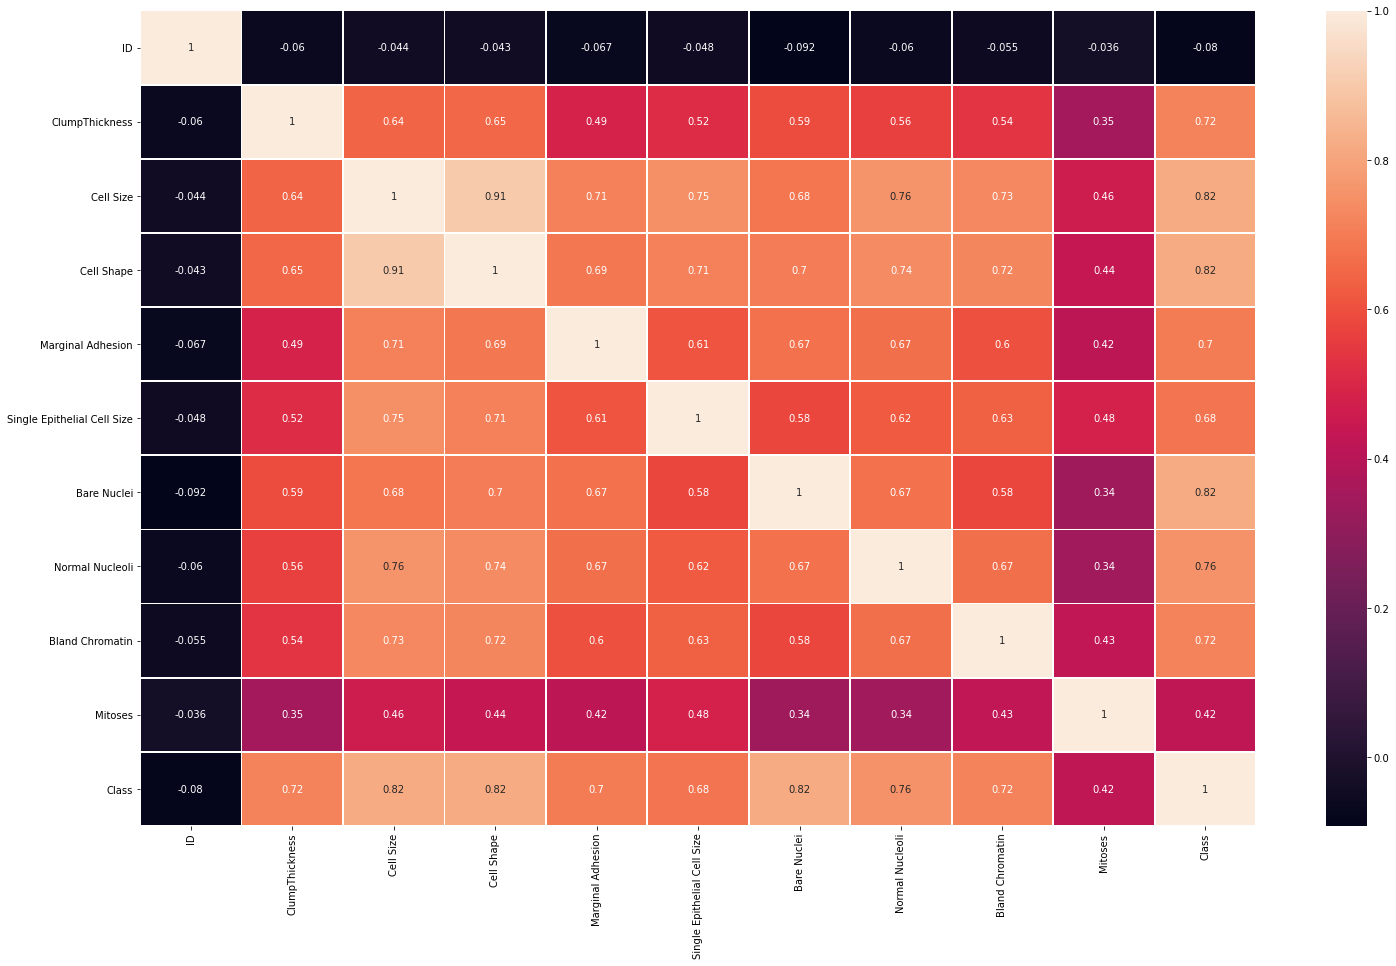

In [27]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.8)
plt.show() 

In [28]:
#from the Heat Map following inferences can be made:

#  - All the columns  except ' Mitoses' are correlated with the target variable.
#     - All these columns are correlated with target variable:
#         ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
#        'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
#        'Bland Chromatin'

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [29]:
# We could see most of the outliers are now removed.

In [30]:
df1 =df.drop(['ID'],axis=1)

In [31]:
df1.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


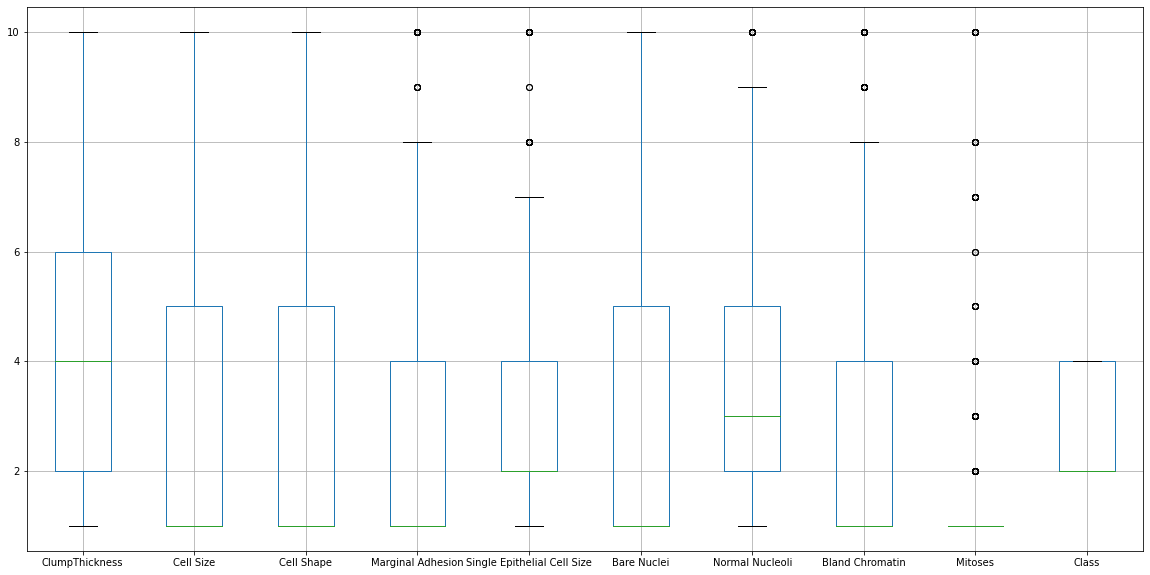

In [32]:
df1.boxplot(figsize=(20,10))

In [33]:
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.073826e+06,4.428986,3.133333,3.204348,2.827536,3.213043,3.482609,3.436232,2.885507,1.594203,2.689855
std,6.196092e+05,2.817378,3.042451,2.960844,2.867787,2.200964,3.617064,2.444060,3.067682,1.724230,0.951379
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.744845e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171752e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238450e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [34]:
# all the values are between 1 to 10

In [35]:
# there are tow classes 2 and 4

In [36]:
pd.crosstab(df1['Marginal Adhesion'], df1['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [37]:
df1['Marginal Adhesion'] = np.where(df1['Marginal Adhesion']>4,4,df1['Marginal Adhesion'])

In [38]:
pd.crosstab(df1['Marginal Adhesion'], df1['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,15,161


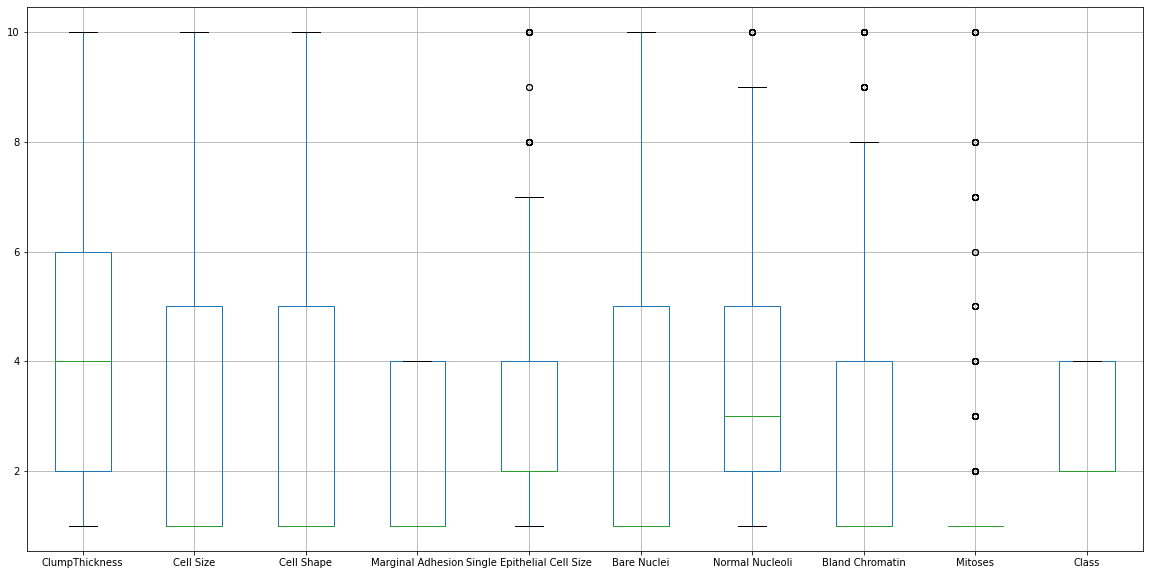

In [39]:
df1.boxplot(figsize=(20,10))

In [40]:
pd.crosstab(df1['Single Epithelial Cell Size'], df1['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [41]:
df1['Single Epithelial Cell Size'] = np.where(df1['Single Epithelial Cell Size']>4,4,df1['Single Epithelial Cell Size'])

In [42]:
pd.crosstab(df1['Single Epithelial Cell Size'], df1['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,20,172


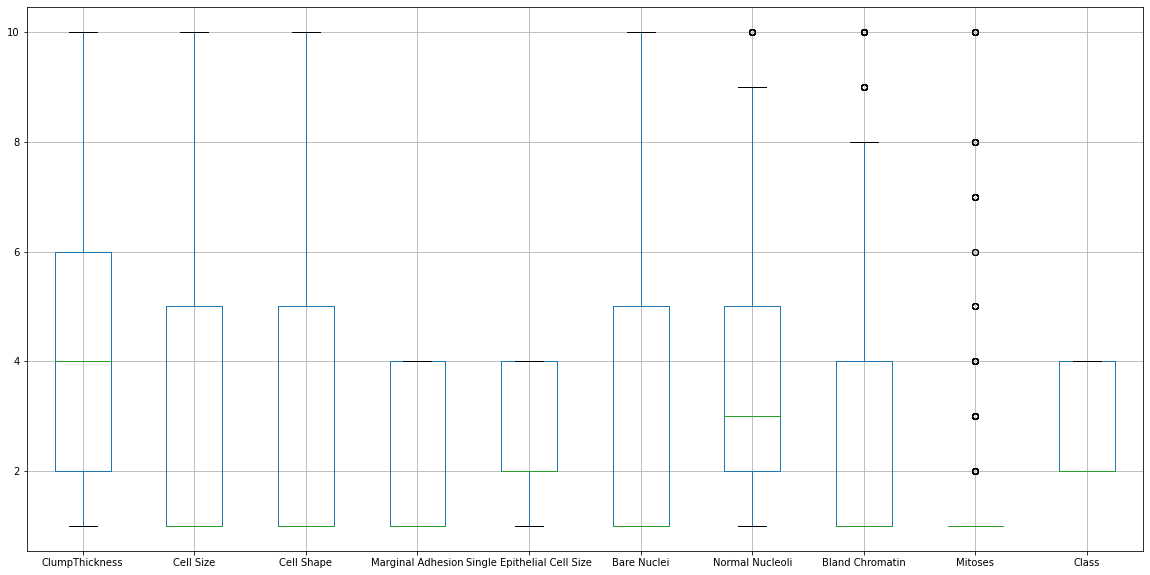

In [43]:
df1.boxplot(figsize=(20,10))

In [44]:
df1['Normal Nucleoli'] = np.where(df1['Normal Nucleoli']>4,4,df1['Normal Nucleoli'])

In [45]:
pd.crosstab(df1['Normal Nucleoli'], df1['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,20,194


In [46]:
df1['Bland Chromatin'] = np.where(df1['Bland Chromatin']>4,4,df1['Bland Chromatin'])

In [47]:
pd.crosstab(df1['Bland Chromatin'], df1['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,14,162


In [48]:
df1['Mitoses'] = np.where(df1['Mitoses']>3,3,df1['Mitoses'])

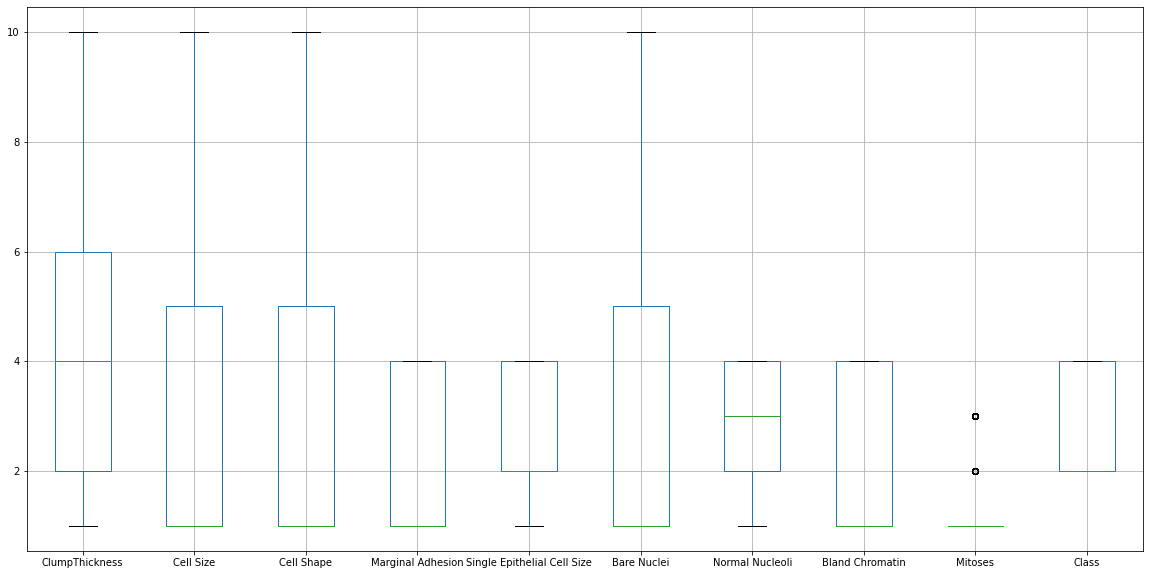

In [49]:
df1.boxplot(figsize=(20,10))

In [50]:
df1 =df.drop(['Class'],axis=1)
df1.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1
5,1017122,8,10,10,8,7,10,9,7,1
6,1018099,1,1,1,1,2,10,3,1,1
7,1018561,2,1,2,1,2,1,3,1,1
8,1033078,2,1,1,1,2,1,1,1,5
9,1033078,4,2,1,1,2,1,2,1,1


In [51]:
from scipy.stats import zscore

df1= df1.apply(zscore)

In [52]:
df1.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,-0.119195,0.202823,-0.701698,-0.745040,-0.637726,-0.551542,-0.686858,-0.178616,-0.615082,-0.344869
1,-0.114479,0.202823,0.285065,0.268920,0.758090,1.721838,1.803153,-0.178616,-0.288866,-0.344869
2,-0.094323,-0.507572,-0.701698,-0.745040,-0.637726,-0.551542,-0.410190,-0.178616,-0.615082,-0.344869
3,-0.092946,0.558020,1.600748,1.620866,-0.637726,-0.096866,0.143146,-0.178616,1.342211,-0.344869
4,-0.091742,-0.152375,-0.701698,-0.745040,0.060182,-0.551542,-0.686858,-0.178616,-0.615082,-0.344869
5,-0.091582,1.268415,2.258590,2.296839,1.804951,1.721838,1.803153,2.278096,1.342211,-0.344869
6,-0.090004,-1.217967,-0.701698,-0.745040,-0.637726,-0.551542,1.803153,-0.178616,-0.615082,-0.344869
7,-0.089258,-0.862769,-0.701698,-0.407053,-0.637726,-0.551542,-0.686858,-0.178616,-0.615082,-0.344869
8,-0.065811,-0.862769,-0.701698,-0.745040,-0.637726,-0.551542,-0.686858,-0.997520,-0.615082,1.976689
9,-0.065811,-0.152375,-0.372777,-0.745040,-0.637726,-0.551542,-0.686858,-0.588068,-0.615082,-0.344869


# Q6 Create a covariance matrix for identifying Principal components

In [53]:
# PCA
# Step 1 - Create covariance matrix


In [54]:
cov_mat = np.cov(df1.T)
cov_mat

array([[ 1.00145138, -0.05967872, -0.04391921, -0.042865  , -0.06686797,
        -0.04817146, -0.0919656 , -0.05988872, -0.05459618, -0.03633892],
       [-0.05967872,  1.00145138,  0.64410677,  0.65453792,  0.48842317,
         0.51800374,  0.59150555,  0.56187702,  0.53628373,  0.35070402],
       [-0.04391921,  0.64410677,  1.00145138,  0.9066632 ,  0.71396807,
         0.74806589,  0.68556472,  0.76073447,  0.7281282 ,  0.46058509],
       [-0.042865  ,  0.65453792,  0.9066632 ,  1.00145138,  0.6917849 ,
         0.71527957,  0.70518656,  0.73964761,  0.72557104,  0.44107467],
       [-0.06686797,  0.48842317,  0.71396807,  0.6917849 ,  1.00145138,
         0.60916409,  0.67348849,  0.67083263,  0.60310209,  0.41761286],
       [-0.04817146,  0.51800374,  0.74806589,  0.71527957,  0.60916409,
         1.00145138,  0.58132945,  0.62142658,  0.63480034,  0.48321685],
       [-0.0919656 ,  0.59150555,  0.68556472,  0.70518656,  0.67348849,
         0.58132945,  1.00145138,  0.67373075

# Q7 Identify eigen values and eigen vector

In [55]:
# Step 2- Get eigen values and eigen vector

In [56]:
eig_vals, eig_vec = np.linalg.eig(cov_mat)
print(eig_vals)
print(eig_vec)

[5.91426359 1.0001849  0.77641861 0.09047021 0.54076502 0.46400663
 0.37075213 0.26309202 0.30111608 0.2934446 ]
[[-0.03408516 -0.99473443 -0.05309117  0.00150758  0.01251634  0.06667615
   0.01156582 -0.02384649 -0.03314557 -0.01082798]
 [ 0.30191071  0.01204693 -0.14790611  0.00260012  0.86865891  0.03440717
   0.00375591 -0.26496975  0.2009354  -0.14307885]
 [ 0.38054833 -0.04256474 -0.05163325  0.73657284 -0.03455639 -0.18302999
  -0.12226078  0.44400949  0.22523419  0.10319392]
 [ 0.37686863 -0.04033075 -0.08649417 -0.66442652  0.02233366 -0.16070282
  -0.07906891  0.59205974  0.14121923  0.06592368]
 [ 0.33418399  0.01163583 -0.04884993 -0.04585933 -0.39283467  0.4867927
   0.02001356 -0.19158883  0.50515794 -0.44734629]
 [ 0.33564287 -0.03643064  0.17142674 -0.06654665 -0.15579059 -0.32903165
  -0.72303698 -0.39052271 -0.19797468 -0.07200087]
 [ 0.33288088  0.0582806  -0.24245333  0.07124923  0.02567235  0.55153056
  -0.0549277   0.14659216 -0.70176036 -0.01070868]
 [ 0.34629988

# Q8 Find variance and cumulative variance by each eigen vector

In [57]:
tot_var = sum(eig_vals)
tot_var

10.014513788098693

In [58]:
var_explained = [(i/tot_var)*100 for i in sorted(eig_vals, reverse=True)]
var_explained

[59.0569219557017,
 9.987353546236706,
 7.752933661155316,
 5.399813017236272,
 4.633341611013975,
 3.7021480889640643,
 3.006796784397093,
 2.9301931673455717,
 2.627107269277848,
 0.9033908986714465]

In [59]:
cum_var_explained = np.cumsum(var_explained)
cum_var_explained

array([ 59.05692196,  69.0442755 ,  76.79720916,  82.19702218,
        86.83036379,  90.53251188,  93.53930866,  96.46950183,
        99.0966091 , 100.        ])

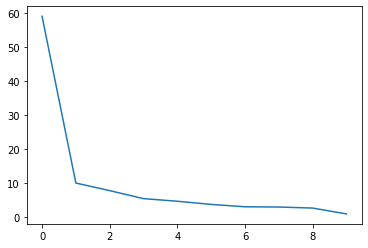

In [60]:
plt.plot(var_explained)

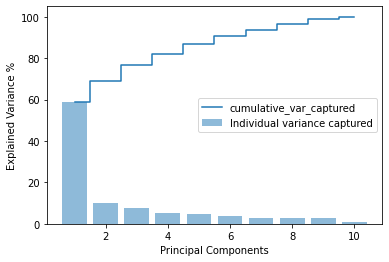

In [61]:
plt.bar(range(1,eig_vals.size+1), var_explained, alpha=0.5, align= 'center', label = 'Individual variance captured')

plt.step(range(1,eig_vals.size+1), cum_var_explained,where='mid', label='cumulative_var_captured')
plt.ylabel('Explained Variance %')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [62]:
from sklearn.decomposition import PCA


In [63]:
pca = PCA(n_components=7)
df_reduced = pca.fit_transform(df1)
df_reduced

array([[-1.45724895, -0.18125035, -0.10283369, ...,  0.03988243,
        -0.09710785,  0.22470625],
       [ 1.46830377, -0.16491552, -0.51775352, ..., -0.76391537,
         1.66176234, -0.99920697],
       [-1.58047508, -0.16407521, -0.06616151, ..., -0.08992409,
        -0.07953061, -0.11301618],
       ...,
       [ 3.83170616,  0.02346793, -0.17813581, ...,  2.49306838,
        -0.21966566,  0.17378381],
       [ 2.27399671, -0.17789292, -1.11060858, ...,  0.75477898,
        -1.05569014,  0.60014684],
       [ 2.67068442, -0.16882835, -1.1875795 , ...,  0.375075  ,
        -0.27635439,  0.78140455]])

In [64]:
pca.components_

array([[-0.03408516,  0.30191071,  0.38054833,  0.37686863,  0.33418399,
         0.33564287,  0.33288088,  0.34629988,  0.33625981,  0.2295694 ],
       [ 0.99473443, -0.01204693,  0.04256474,  0.04033075, -0.01163583,
         0.03643064, -0.0582806 ,  0.00182397,  0.0223431 ,  0.03947404],
       [-0.05309117, -0.14790611, -0.05163325, -0.08649417, -0.04884993,
         0.17142674, -0.24245333, -0.23042062,  0.01888538,  0.90617355],
       [-0.01251634, -0.86865891,  0.03455639, -0.02233366,  0.39283467,
         0.15579059, -0.02567235,  0.18287948,  0.13365481, -0.11412597],
       [-0.06667615, -0.03440717,  0.18302999,  0.16070282, -0.4867927 ,
         0.32903165, -0.55153056,  0.00966991,  0.48354323, -0.22742601],
       [-0.01156582, -0.00375591,  0.12226078,  0.07906891, -0.02001356,
         0.72303698,  0.0549277 , -0.2644724 , -0.59611953, -0.16476747],
       [-0.03314557,  0.2009354 ,  0.22523419,  0.14121923,  0.50515794,
        -0.19797468, -0.70176036,  0.10883986

# Q10 Find correlation between components and features

In [65]:
# components are columns in original dataset and features are the columns in transformed dataset

In [66]:
df1.columns
cols = ['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses']

In [67]:
df_comp= pd.DataFrame(pca.components_, columns=cols)

In [68]:
df_comp

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,-0.034085,0.301911,0.380548,0.376869,0.334184,0.335643,0.332881,0.346300,0.336260,0.229569
1,0.994734,-0.012047,0.042565,0.040331,-0.011636,0.036431,-0.058281,0.001824,0.022343,0.039474
2,-0.053091,-0.147906,-0.051633,-0.086494,-0.048850,0.171427,-0.242453,-0.230421,0.018885,0.906174
3,-0.012516,-0.868659,0.034556,-0.022334,0.392835,0.155791,-0.025672,0.182879,0.133655,-0.114126
4,-0.066676,-0.034407,0.183030,0.160703,-0.486793,0.329032,-0.551531,0.009670,0.483543,-0.227426
5,-0.011566,-0.003756,0.122261,0.079069,-0.020014,0.723037,0.054928,-0.264472,-0.596120,-0.164767
6,-0.033146,0.200935,0.225234,0.141219,0.505158,-0.197975,-0.701760,0.108840,-0.296873,-0.032046


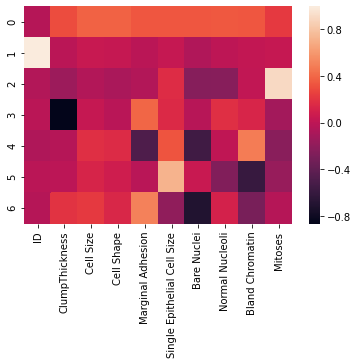

In [69]:
sns.heatmap(df_comp)